<a href="https://colab.research.google.com/github/CristianRiquelmeF/Analisis-PCA/blob/main/An%C3%A1lisis_de_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> Descubriendo estructuras ocultas: Reducción de dimensionalidad con PCA

**Objetivo:** Aplicar PCA en un conjunto de datos multivariado, interpretar los resultados, visualizar la proyección en 2D, y reflexionar sobre el impacto de la reducción de dimensionalidad en el análisis exploratorio de datos y la preparación de modelos predictivos.



In [ ]:
# Carga de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**1.Carga y preprocesamiento de Dataset**

In [ ]:
# Cargar California Housing
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()
# columnas y objetivo
X = df.drop(columns=[data.target_names[0]])
y = df[data.target_names[0]]  # MedianHouseValue (target continuous)

print("Columnas:", list(X.columns))
print("Tamaño:", X.shape)

Columnas: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Tamaño: (20640, 8)


In [ ]:
# Información de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

**2.PCA con Scikit-learn**

In [ ]:
# PCA completo (para ver varianza acumulada)
pca_full = PCA()
pca_full.fit(X_scaled)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

In [ ]:
# PCA reducido a 2 y 3 componentes
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

In [ ]:
# Loadings (componente vs variable): interpretación de qué variables influyen más
loadings = pd.DataFrame(pca_full.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(X.shape[1])])

**3.Visualización de datos en 2D**

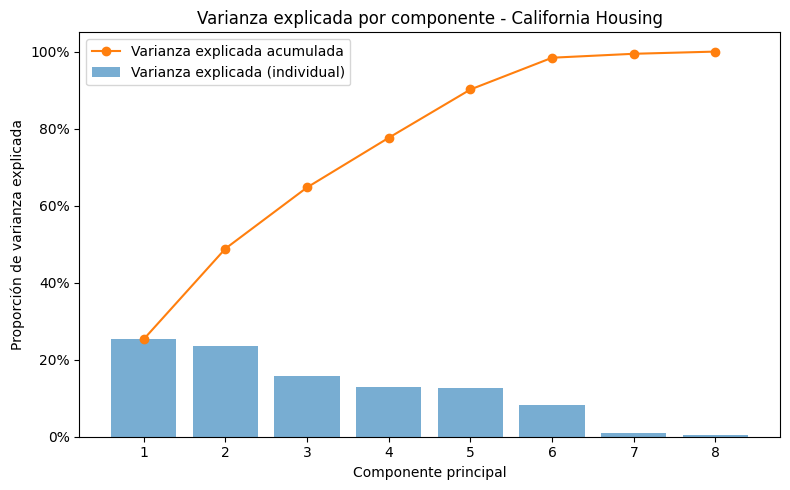

In [ ]:
import matplotlib.ticker as mtick

# Varianza explicada (individual y acumulada)
plt.figure(figsize=(8,5))
components = np.arange(1, len(explained)+1)
plt.bar(components, explained, alpha=0.6, label='Varianza explicada (individual)')
plt.plot(components, cum_explained, marker='o', color='C1', label='Varianza explicada acumulada')
plt.xticks(components)
plt.xlabel('Componente principal')
plt.ylabel('Proporción de varianza explicada')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Varianza explicada por componente - California Housing')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Imprimir porcentaje acumulado para las primeras componentes
for i in [1,2,3,4,5]:
    print(f"PC1..PC{i} - Varianza acumulada: {cum_explained[i-1]:.3f} ({cum_explained[i-1]*100:.1f}%)")

PC1..PC1 - Varianza acumulada: 0.253 (25.3%)
PC1..PC2 - Varianza acumulada: 0.489 (48.9%)
PC1..PC3 - Varianza acumulada: 0.647 (64.7%)
PC1..PC4 - Varianza acumulada: 0.776 (77.6%)
PC1..PC5 - Varianza acumulada: 0.902 (90.2%)


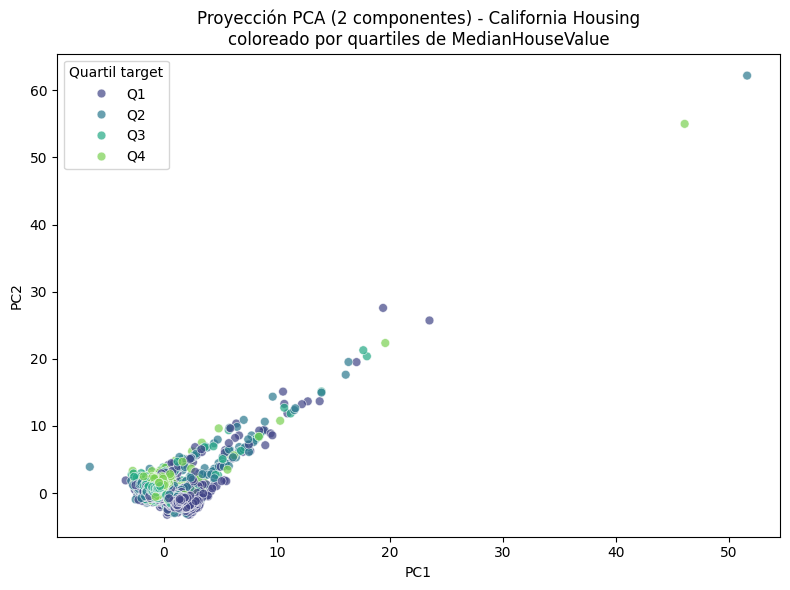

In [ ]:
# Proyección 2D: colorear por quartiles del target (porque no hay etiquetas de clase)
# crear etiquetas por rango del target para visualización
quartiles = pd.qcut(y, q=4, labels=['Q1','Q2','Q3','Q4'])
proj2_df = pd.DataFrame(X_pca2, columns=['PC1','PC2'])
proj2_df['target'] = y.values
proj2_df['target_bin'] = quartiles.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=proj2_df, x='PC1', y='PC2', hue='target_bin', palette='viridis', alpha=0.7, s=40)
plt.title('Proyección PCA (2 componentes) - California Housing\ncoloreado por quartiles de MedianHouseValue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Quartil target')
plt.tight_layout()
plt.show()

- PCA ha logrado transformar un espacio de 8 dimensiones a 2 con pérdida mínima de información relevante para la variabilidad.

- Esta representación puede ser útil para visualizar tendencias, detectar valores atípicos o preparar modelos que usen solo las primeras PCs para simplificar.

- Los agrupamientos no son categóricos sino graduales, lo que es coherente con que el target es continuo.

In [ ]:
# Mostrar los loadings (primeras 3 componentes)
print('\nLoadings (primeras 3 PCs):')
print(loadings[['PC1','PC2','PC3']].round(3))


Loadings (primeras 3 PCs):
              PC1    PC2    PC3
MedInc      0.077  0.230  0.218
HouseAge    0.007 -0.261 -0.628
AveRooms    0.439  0.547 -0.064
AveBedrms   0.400  0.502 -0.192
Population -0.172  0.101  0.650
AveOccup   -0.015  0.003  0.158
Latitude    0.568 -0.374  0.193
Longitude  -0.537  0.422 -0.181


- Los loadings (cargas) indican cómo contribuye cada variable original a cada Componente Principal (PC). Valores cercanos a ±1 indican una influencia fuerte, mientras que valores cercanos a 0 indican poca relevancia.
- Si PC1 y PC2 ya explican ~50% de la varianza, podrían usarse para:
Visualizar tendencias geográficas (ej: precios altos en zonas costeras).
Clasificar tipos de vivienda (ej: grandes vs. antiguas).


**4.Interpretación de resultados**
- ¿Cuánta información conserva el nuevo espacio?
   
     -Con 2 componentes (PC1 + PC2): Se conserva ~48.9% de la varianza original.
Esto significa que se pierde más del 50% de la información al reducir a 2D.
Puede ser suficiente para visualización, pero insuficiente para modelado predictivo preciso.

- ¿Se observan agrupamientos o patrones más claros?

   -Se observa que los puntos no están mezclados aleatoriamente. Hay una gradación del color (y por tanto del valor del target) que podría indicar que los valores más bajos y más altos tienden a agruparse en regiones diferentes del espacio PCA. Esto sugiere que las componentes principales capturan patrones relacionados con el valor de la vivienda.
Sin embargo, no se forman grupos muy separados o clusters definidos, sino un gradiente.


